In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pysubgroup as ps

In [2]:
sys.path.append(os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'sd-4sql\\packages'))
saved_path = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))),'Data\\saved-data\\')

In [3]:
from sd_analysis import *
from subgroup_discovery import *
from sd_postprocessing import *

In [4]:
import matplotlib.pyplot as plt
import matplotlib

In [5]:
import warnings
warnings.filterwarnings("ignore")

### Table = mvtrealise

In [6]:
queries = pd.read_csv(saved_path + 'dataset-d2.csv')

In [7]:
queries

,day,hour,query,nrows,length,time,serverName,declination,codeVersion,softwareVersion,...,GROUPBY_fr.infologic.stocks.gestion.modele.mvtrealise.lot,GROUPBY_fr.infologic.stocks.gestion.modele.mvtrealise.unitexped,GROUPBY_fr.infologic.stocks.gestion.modele.mvtrealise.empla,GROUPBY_fr.infologic.stocks.gestion.modele.mvtrealise.prod,GROUPBY_fr.infologic.stocks.gestion.modele.mvtrealise.lieu.site.ik,GROUPBY_fr.infologic.stocks.gestion.modele.mvtrealise.lieu.ik,GROUPBY_fr.infologic.stocks.gestion.modele.mvtrealise.typmvt.originemvt,GROUPBY_fr.infologic.stocks.gestion.modele.mvtrealise.lot.ik,GROUPBY_fr.infologic.stocks.gestion.modele.mvtrealise.lieu.site.soc,GROUPBY_fr.infologic.stocks.gestion.modele.mvtrealise.datprepsaisie
0,Thursday,7,select a from fr.infologic.stocks.gestion.mode...,0.0,184,5474.0,XNQDGBYNM58,Ventes,V07_1,V7_1,...,0,0,0,0,0,0,0,0,0,0
1,Friday,7,select a from fr.infologic.stocks.gestion.mode...,1.0,211,6123.0,XNQDGBYNM58,Ventes,V07_1,V7_1,...,0,0,0,0,0,0,0,0,0,0
2,Friday,7,select a from fr.infologic.stocks.gestion.mode...,0.0,184,5318.0,XNQDGBYNM58,Ventes,V07_1,V7_1,...,0,0,0,0,0,0,0,0,0,0
3,Monday,7,select a from fr.infologic.stocks.gestion.mode...,1.0,211,6146.0,XNQDGBYNM58,Ventes,V07_1,V7_1,...,0,0,0,0,0,0,0,0,0,0
4,Monday,9,select a from fr.infologic.stocks.gestion.mode...,0.0,184,5610.0,XNQDGBYNM58,Ventes,V07_1,V7_1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48818,Tuesday,22,select fr.infologic.stocks.utils.persistence.s...,38.0,454,6850.0,RMCLGBQKCBE,Superviseur,V16_3,V16_3.cce34d8.26/01/2021 18:36,...,0,0,0,0,0,0,0,0,0,0
48819,Friday,14,select fr.infologic.stocks.utils.persistence.s...,4860.0,354,16518.0,JVXTGBAA,Ventes,V11_2,V11_2.d47977.31/07/2018 20:51,...,0,0,0,0,0,0,0,1,0,0
48820,Friday,14,select fr.infologic.stocks.utils.persistence.s...,4560.0,1126,13178.0,JVXTGBAA,Ventes,V11_2,V11_2.d47977.31/07/2018 20:51,...,0,0,0,0,0,1,0,1,0,0
48821,Friday,14,select fr.infologic.stocks.utils.persistence.s...,1706.0,354,7445.0,JVXTGBAA,Ventes,V11_2,V11_2.d47977.31/07/2018 20:51,...,0,0,0,0,0,0,0,1,0,0


## Use cases 1 : Execution TIME

#### Support

In [7]:
result_supp = sd_binary_conds (queries, dict_conds = {}, _target = 'time_disc', mesure  = 'Support', _depth  = 1,
                               threshold = 10000, result_size = 100, algorithm   = 'Beam Search', _beam_width = 100)
res_supp = result_supp.to_dataframe()
res_supp[:10]

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,1.0,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,48821.0,48823.0,31609.0,31609.0,2.0,0.999959,0.000041,1.0,0.0,0.647447,0.0,0.64742,1.000041
1,1.0,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,48821.0,48823.0,31609.0,31609.0,2.0,0.999959,0.000041,1.0,0.0,0.647447,0.0,0.64742,1.000041
2,1.0,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,48821.0,48823.0,31609.0,31609.0,2.0,0.999959,0.000041,1.0,0.0,0.647447,0.0,0.64742,1.000041
3,1.0,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,48821.0,48823.0,31609.0,31609.0,2.0,0.999959,0.000041,1.0,0.0,0.647447,0.0,0.64742,1.000041
4,1.0,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,48805.0,48823.0,31609.0,31609.0,18.0,0.999631,0.000369,1.0,0.0,0.647659,0.0,0.64742,1.000369
5,1.0,WHERE_fr.infologic.stocks.gestion.modele.mvtre...,48817.0,48823.0,31609.0,31609.0,6.0,0.999877,0.000123,1.0,0.0,0.647500,0.0,0.64742,1.000123
6,1.0,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,48821.0,48823.0,31609.0,31609.0,2.0,0.999959,0.000041,1.0,0.0,0.647447,0.0,0.64742,1.000041
7,1.0,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,48821.0,48823.0,31609.0,31609.0,2.0,0.999959,0.000041,1.0,0.0,0.647447,0.0,0.64742,1.000041
8,1.0,WHERE_fr.infologic.stocks.gestion.modele.mvtre...,48817.0,48823.0,31609.0,31609.0,6.0,0.999877,0.000123,1.0,0.0,0.647500,0.0,0.64742,1.000123
9,1.0,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,48821.0,48823.0,31609.0,31609.0,2.0,0.999959,0.000041,1.0,0.0,0.647447,0.0,0.64742,1.000041


#### Lift

In [8]:
result_lift = sd_binary_conds (queries, dict_conds = {}, _target = 'time_disc', mesure  = 'Lift', _depth  = 1,
                               threshold = 10000, result_size = 100, algorithm   = 'Beam Search', _beam_width = 100)
res_lift = result_lift.to_dataframe()
res_lift[:10]

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.35258,WHERE_fr.infologic.stocks.gestion.modele.mvtre...,2.0,48823.0,2.0,31609.0,48821.0,0.000041,0.999959,0.000063,0.999937,1.0,0.647393,0.64742,1.544592
1,0.35258,serverName=='EAPKGBG58OG',1.0,48823.0,1.0,31609.0,48822.0,0.000020,0.999980,0.000032,0.999968,1.0,0.647400,0.64742,1.544592
2,0.35258,FROM_fr.infologic.stocks.fichierbase.modele.pr...,21.0,48823.0,21.0,31609.0,48802.0,0.000430,0.999570,0.000664,0.999336,1.0,0.647255,0.64742,1.544592
3,0.35258,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,1.0,48823.0,1.0,31609.0,48822.0,0.000020,0.999980,0.000032,0.999968,1.0,0.647400,0.64742,1.544592
4,0.35258,blockedSessions=='Bloquant',2.0,48823.0,2.0,31609.0,48821.0,0.000041,0.999959,0.000063,0.999937,1.0,0.647393,0.64742,1.544592
5,0.35258,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,1.0,48823.0,1.0,31609.0,48822.0,0.000020,0.999980,0.000032,0.999968,1.0,0.647400,0.64742,1.544592
6,0.35258,serverName=='XHWDGBNB',4.0,48823.0,4.0,31609.0,48819.0,0.000082,0.999918,0.000127,0.999873,1.0,0.647378,0.64742,1.544592
7,0.35258,codeVersion=='V16_1_2',4.0,48823.0,4.0,31609.0,48819.0,0.000082,0.999918,0.000127,0.999873,1.0,0.647378,0.64742,1.544592
8,0.35258,WHERE_fr.infologic.stocks.gestion.modele.mvtre...,1.0,48823.0,1.0,31609.0,48822.0,0.000020,0.999980,0.000032,0.999968,1.0,0.647400,0.64742,1.544592
9,0.35258,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,1.0,48823.0,1.0,31609.0,48822.0,0.000020,0.999980,0.000032,0.999968,1.0,0.647400,0.64742,1.544592


#### WRAcc

In [9]:
result_wracc = sd_binary_conds (queries, dict_conds = {}, _target = 'time_disc', mesure  = 'WRAcc', _depth  = 1,
                               threshold = 10000, result_size = 100, algorithm   = 'Beam Search', _beam_width = 100)
res_wracc = result_wracc.to_dataframe()
res_wracc[:10]

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.148169,WHERE_fr.infologic.stocks.gestion.modele.mvtre...,20821.0,48823.0,20714.0,31609.0,28002.0,0.426459,0.573541,0.655320,0.344680,0.994861,0.389065,0.64742,1.536654
1,0.145934,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,23240.0,48823.0,22171.0,31609.0,25583.0,0.476005,0.523995,0.701414,0.298586,0.954002,0.368902,0.64742,1.473543
2,0.120722,jdbcMax: [150.0:200.0[,30240.0,48823.0,25472.0,31609.0,18583.0,0.619380,0.380620,0.805846,0.194154,0.842328,0.330230,0.64742,1.301053
3,0.104415,WHERE_fr.infologic.stocks.gestion.modele.mvtre...,24170.0,48823.0,20746.0,31609.0,24653.0,0.495054,0.504946,0.656332,0.343668,0.858337,0.440618,0.64742,1.325780
4,0.103021,WHERE_fr.infologic.stocks.gestion.modele.mvtre...,24774.0,48823.0,21069.0,31609.0,24049.0,0.507425,0.492575,0.666551,0.333449,0.850448,0.438254,0.64742,1.313595
5,0.094002,jdbcMin.isnull(),31994.0,48823.0,25303.0,31609.0,16829.0,0.655306,0.344694,0.800500,0.199500,0.790867,0.374688,0.64742,1.221567
6,0.093095,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,31375.0,48823.0,24858.0,31609.0,17448.0,0.642627,0.357373,0.786422,0.213578,0.792287,0.386899,0.64742,1.223760
7,0.092066,WHERE_fr.infologic.stocks.gestion.modele.mvtre...,32557.0,48823.0,25573.0,31609.0,16266.0,0.666837,0.333163,0.809042,0.190958,0.785484,0.371058,0.64742,1.213252
8,0.084438,dbProcessMax: [150.0:250.0[,33523.0,48823.0,25826.0,31609.0,15300.0,0.686623,0.313377,0.817046,0.182954,0.770396,0.377949,0.64742,1.189948
9,0.074474,softwareVersion=='V10_3.f8e07c7.05/06/2019 14:20',11209.0,48823.0,10893.0,31609.0,37614.0,0.229584,0.770416,0.344617,0.655383,0.971808,0.550738,0.64742,1.501047


#### Binomial

In [10]:
result_binomial = sd_binary_conds (queries, dict_conds = {}, _target = 'time_disc', mesure  = 'Binomial', _depth  = 1,
                                   threshold = 10000, result_size = 100, algorithm   = 'Beam Search', _beam_width = 100)
res_binomial = result_binomial.to_dataframe()
res_binomial[:10]

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.226892,WHERE_fr.infologic.stocks.gestion.modele.mvtre...,20821.0,48823.0,20714.0,31609.0,28002.0,0.426459,0.573541,0.655320,0.344680,0.994861,0.389065,0.64742,1.536654
1,0.211520,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,23240.0,48823.0,22171.0,31609.0,25583.0,0.476005,0.523995,0.701414,0.298586,0.954002,0.368902,0.64742,1.473543
2,0.159015,serverName=='HOLOGBOTBHP',10089.0,48823.0,10061.0,31609.0,38734.0,0.206644,0.793356,0.318295,0.681705,0.997225,0.556293,0.64742,1.540305
3,0.157738,nrows>=1529945.0,9772.0,48823.0,9772.0,31609.0,39051.0,0.200152,0.799848,0.309152,0.690848,1.000000,0.559178,0.64742,1.544592
4,0.157706,time: [12902.0:37113.0[,9768.0,48823.0,9768.0,31609.0,39055.0,0.200070,0.799930,0.309026,0.690974,1.000000,0.559223,0.64742,1.544592
5,0.157682,time>=37113.0,9765.0,48823.0,9765.0,31609.0,39058.0,0.200008,0.799992,0.308931,0.691069,1.000000,0.559257,0.64742,1.544592
6,0.157649,time: [10863.0:12902.0[,9761.0,48823.0,9761.0,31609.0,39062.0,0.199926,0.800074,0.308804,0.691196,1.000000,0.559302,0.64742,1.544592
7,0.157100,SELECT_fr.infologic.stocks.gestion.modele.mvtr...,10505.0,48823.0,10359.0,31609.0,38318.0,0.215165,0.784835,0.327723,0.672277,0.986102,0.554555,0.64742,1.523125
8,0.156568,codeVersion=='V09_1',10297.0,48823.0,10177.0,31609.0,38526.0,0.210905,0.789095,0.321965,0.678035,0.988346,0.556285,0.64742,1.526591
9,0.156568,softwareVersion=='V9_1',10297.0,48823.0,10177.0,31609.0,38526.0,0.210905,0.789095,0.321965,0.678035,0.988346,0.556285,0.64742,1.526591


#### Post-processing

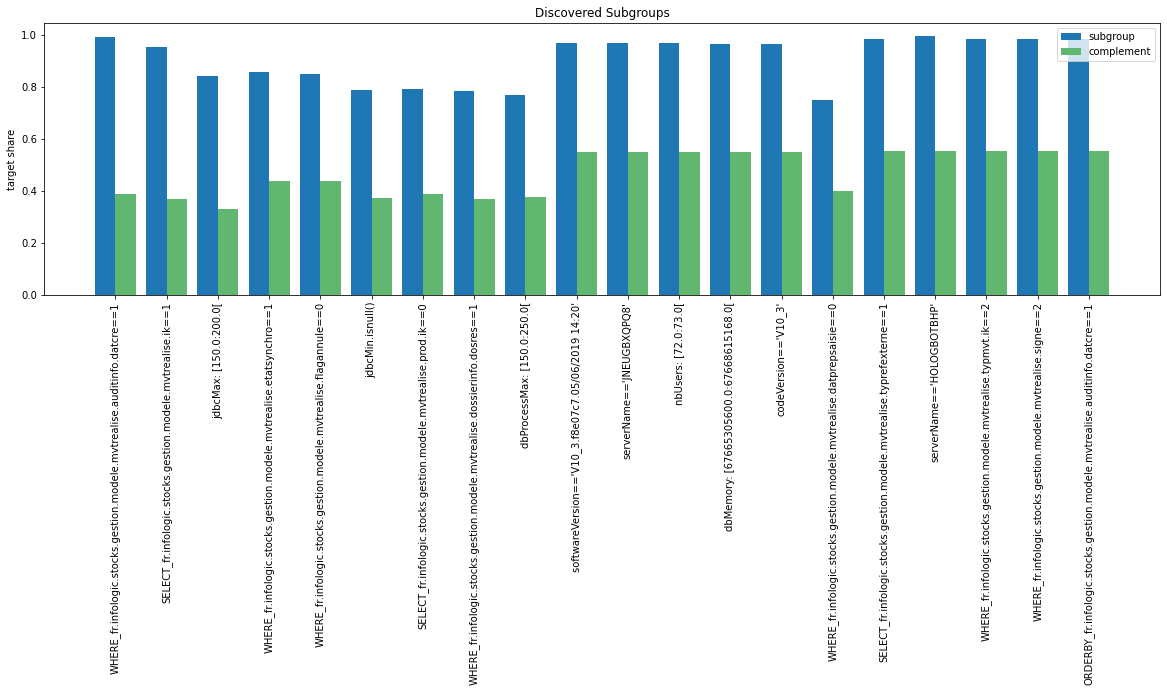

In [11]:
plot_sgbars(res_wracc, 20, ylabel="target share", title="Discovered Subgroups", dynamic_widths=False, _suffix="")

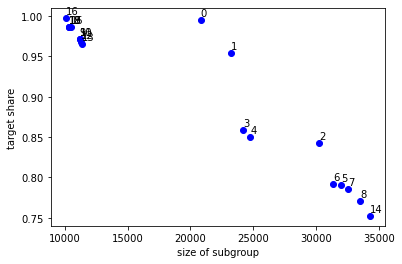

In [12]:
plot_npspace(res_wracc, 20, queries, annotate=True, fixed_limits=False)

In [13]:
d, d_names, sg_names = greedy_jaccard(result_wracc.to_descriptions(),20, queries, 0.8)
for sg in d_names.keys() :
    print(sg)

WHERE_fr.infologic.stocks.gestion.modele.mvtrealise.auditinfo.datcre==1
jdbcMax: [150.0:200.0[
SELECT_fr.infologic.stocks.gestion.modele.mvtrealise.prod.ik==0
softwareVersion=='V10_3.f8e07c7.05/06/2019 14:20'
SELECT_fr.infologic.stocks.gestion.modele.mvtrealise.typrefexterne==1


In [14]:
similarity_sgs(result_wracc.to_descriptions(), 20, queries, color=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.886011,0.682184,0.856218,0.840438,0.647637,0.660442,0.639525,0.618152,0.492544,0.492544,0.492544,0.490533,0.491513,0.607044,0.479037,0.482352,0.482133,0.482110,0.482087
1,0.886011,1.000000,0.666823,0.791964,0.800367,0.624434,0.736953,0.696215,0.605743,0.453360,0.453360,0.453360,0.456029,0.457062,0.593790,0.443883,0.431658,0.446170,0.446213,0.446194
2,0.682184,0.666823,1.000000,0.614684,0.615161,0.838414,0.619998,0.626360,0.852283,0.370668,0.370668,0.370668,0.373578,0.374921,0.647454,0.338623,0.333631,0.339966,0.339954,0.339943
3,0.856218,0.791964,0.614684,1.000000,0.975620,0.587361,0.770359,0.742390,0.563750,0.426055,0.426055,0.426055,0.424549,0.425435,0.704685,0.414325,0.415603,0.416578,0.416619,0.416660
4,0.840438,0.800367,0.615161,0.975620,1.000000,0.582251,0.780530,0.760456,0.565104,0.416152,0.416152,0.416152,0.414937,0.415918,0.721342,0.416543,0.405483,0.418544,0.418584,0.418624
5,0.647637,0.624434,0.838414,0.587361,0.582251,1.000000,0.563431,0.566544,0.897778,0.350347,0.350347,0.350347,0.353097,0.354410,0.586526,0.314172,0.315340,0.315335,0.315325,0.315316
6,0.660442,0.736953,0.619998,0.770359,0.780530,0.563431,1.000000,0.942868,0.578374,0.338993,0.338993,0.338993,0.341296,0.342152,0.806862,0.334821,0.320299,0.330486,0.330518,0.330550
7,0.639525,0.696215,0.626360,0.742390,0.760456,0.566544,0.942868,1.000000,0.584310,0.320640,0.320640,0.320640,0.320228,0.321055,0.803750,0.322665,0.308681,0.318488,0.318518,0.318549
8,0.618152,0.605743,0.852283,0.563750,0.565104,0.897778,0.578374,0.584310,1.000000,0.334367,0.334367,0.334367,0.336993,0.338166,0.603509,0.306275,0.300958,0.307321,0.307351,0.307342
9,0.492544,0.453360,0.370668,0.426055,0.416152,0.350347,0.338993,0.320640,0.334367,1.000000,1.000000,1.000000,0.992210,0.988535,0.304777,0.000876,0.000000,0.000835,0.000835,0.000835


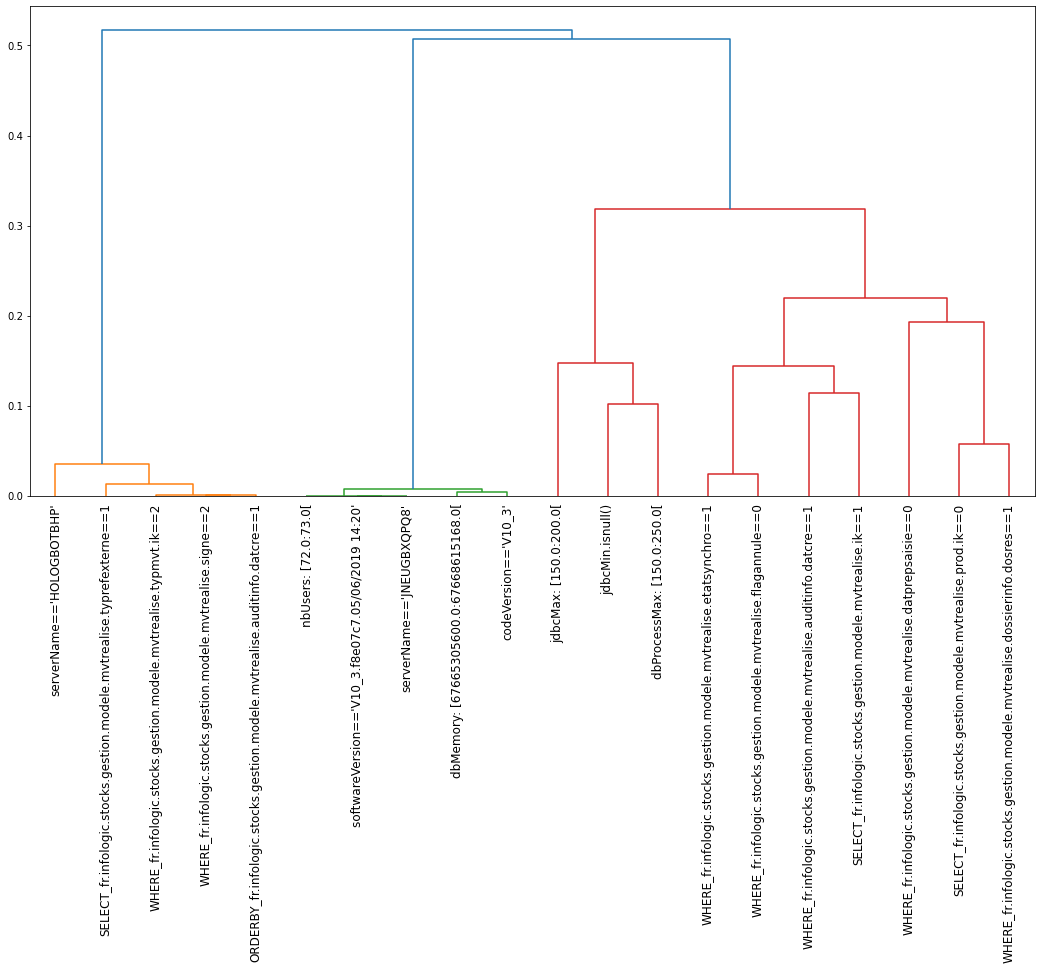

In [15]:
similarity_dendrogram(result_wracc.to_descriptions(), 20, queries)

WHERE_fr.infologic.stocks.gestion.modele.mvtrealise.auditinfo.datcre==1
jdbcMin.isnull()
jdbcMax: [150.0:200.0[
nbUsers: [72.0:73.0[
codeVersion=='V10_3'
SELECT_fr.infologic.stocks.gestion.modele.mvtrealise.typrefexterne==1
WHERE_fr.infologic.stocks.gestion.modele.mvtrealise.datprepsaisie==0
WHERE_fr.infologic.stocks.gestion.modele.mvtrealise.signe==2
0.8562175096955195


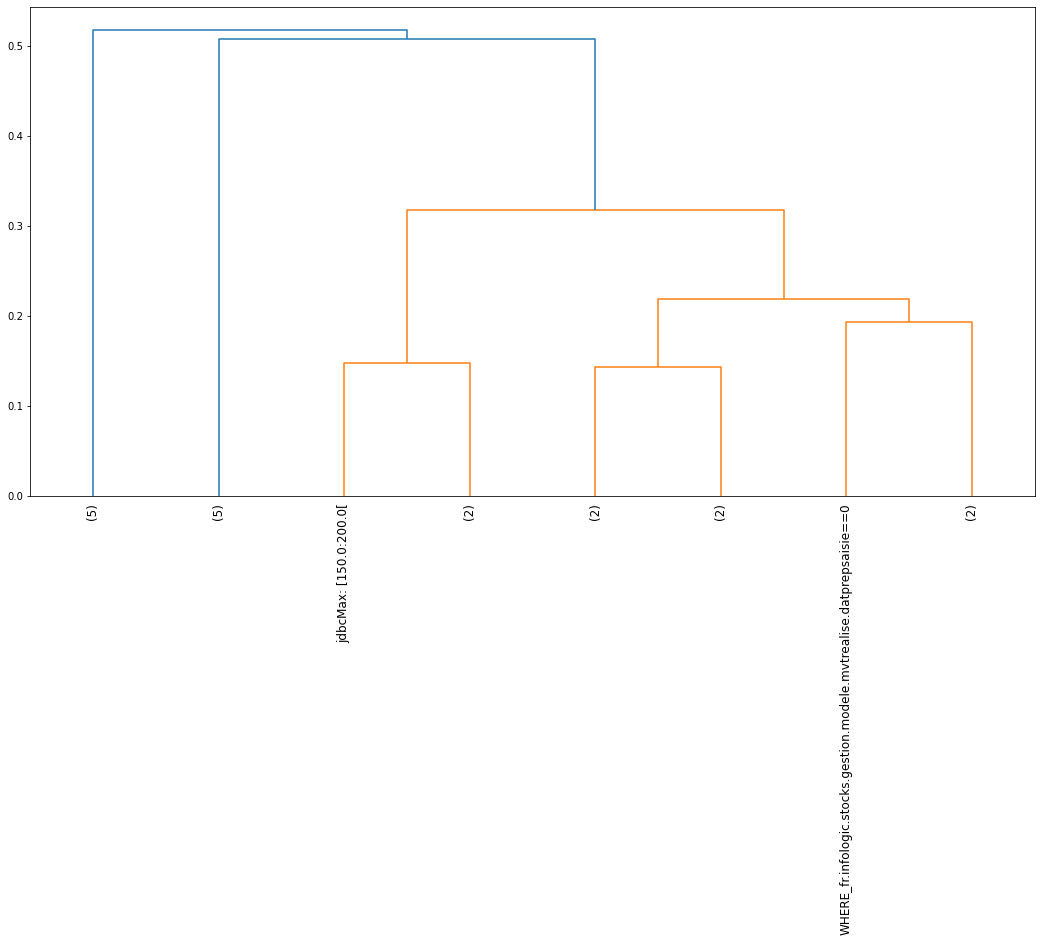

In [16]:
indices = similarity_dendrogram(result_wracc.to_descriptions(), 20, queries,truncated = True, p = 8)

In [17]:
res_raf = res_wracc[res_wracc.index.isin(indices)]

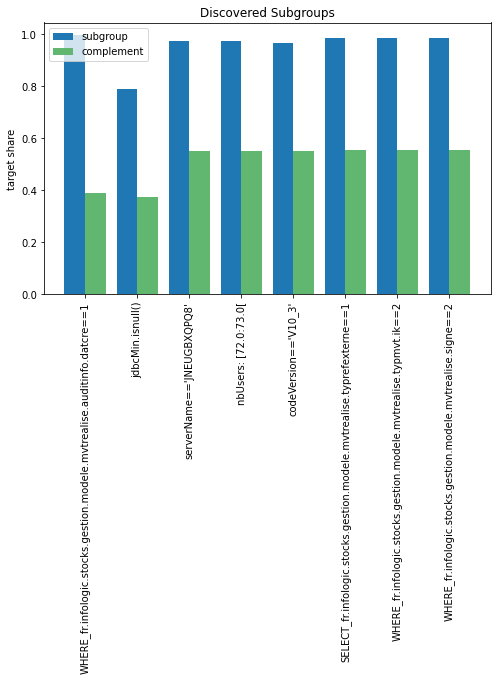

In [18]:
plot_sgbars(res_raf, res_raf.shape[0], ylabel="target share", title="Discovered Subgroups", 
            dynamic_widths=False, _suffix="")

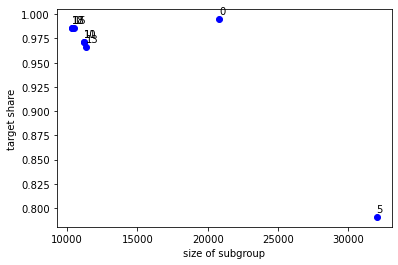

In [19]:
plot_npspace(res_raf, res_raf.shape[0], queries, annotate=True, fixed_limits=False)